In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# notes: scanpy has several versions, afer 17May2020, it become 1.5.1 from 1.4.6
!pip install scanpy
!pip install leidenalg

In [0]:
#!pip install bbknn==1.3.6
#!pip install umap-learn==0.3.9

In [3]:
import h5py
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# notice that scanpy already became 1.5.1 after 17May2020
sc.settings.verbosity = 3 
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, figsize=(4, 4))

scanpy==1.5.1 anndata==0.7.3 umap==0.4.3 numpy==1.18.4 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.2 leidenalg==0.8.0


In [0]:
import os
os.chdir("/content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/Florian_data")

#First check the concat_florian's data

In [6]:
%ls -lth

total 8.0G
-rw------- 1 root root  10M May 29 15:02 29May2020_florian_concat_annotation.ipynb
-rw------- 1 root root 2.4G May 29 14:43 florian_concat_leiden.h5ad
drwx------ 2 root root 4.0K May 26 03:38 tables/
-rw------- 1 root root 3.2M May 26 03:17 14May2020_florian_3sets.ipynb
-rw------- 1 root root 2.2M May 26 02:31 25May2020_florian_concat_bbknn.ipynb
-rw------- 1 root root 8.4M May 26 02:30 25May2020_florian_concat_pl.ipynb
-rw------- 1 root root 5.3M May 25 22:22 25May2020_florian_concat_pp.ipynb
-rw------- 1 root root 2.3G May 25 20:47 florian_concat_pca.h5ad
-rw------- 1 root root 1.7G May 25 19:15 concat_florian_whole_donor_raw.h5ad
-rw------- 1 root root 1.8G May 25 19:13 florian_ipsc_whole_donor_raw.h5ad
drwx------ 2 root root 4.0K May 25 16:25 cache/
-rw------- 1 root root  151 May 18 02:10 Florian_data.gslides
drwx------ 2 root root 4.0K May 17 00:48 vireo_cell_line_assignments/
drwx------ 2 root root 4.0K May 13 20:08 figures/
-rw------- 1 root root 4.0K May 11 15:50 sc

In [0]:
adata = sc.read_h5ad("florian_concat_leiden.h5ad")

In [40]:
adata

AnnData object with n_obs × n_vars = 60832 × 2954
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0.6', 'leiden_0.4', 'leiden_0.2', 'leiden_0.1'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

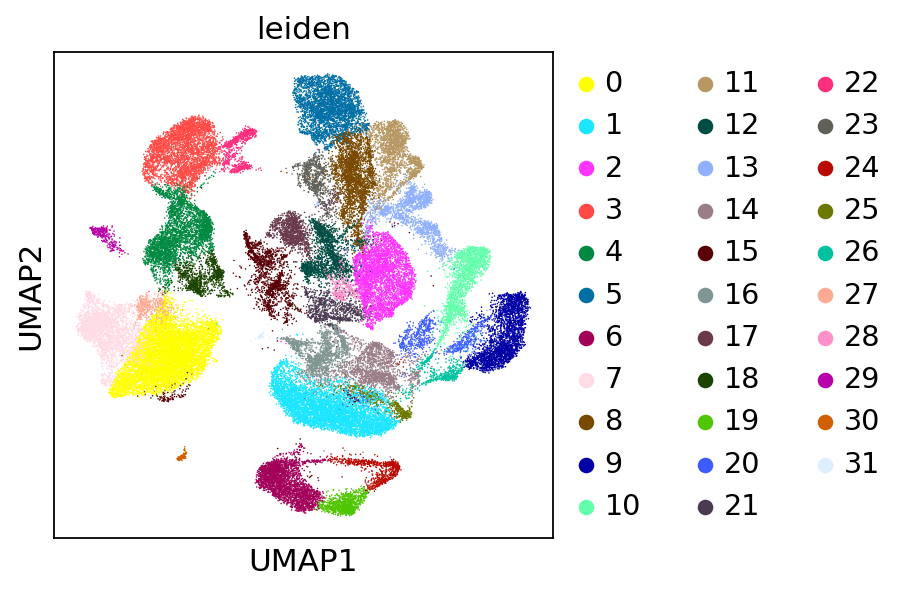

In [41]:
# since the catgorical numbers above 30, it automatically use the palette of sc.pl.palettes.godsnot_102
# it seems that sc.pl.palettes.godsnot_102 is also the sc.pl.palettes.default_102
sc.pl.umap(adata, color=["leiden"])

In [43]:
# notice that after applying umap using sc.pl.umap(adata, color=["leiden"]), its color will be saved in uns, remember to save it 
adata

AnnData object with n_obs × n_vars = 60832 × 2954
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0.6', 'leiden_0.4', 'leiden_0.2', 'leiden_0.1'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

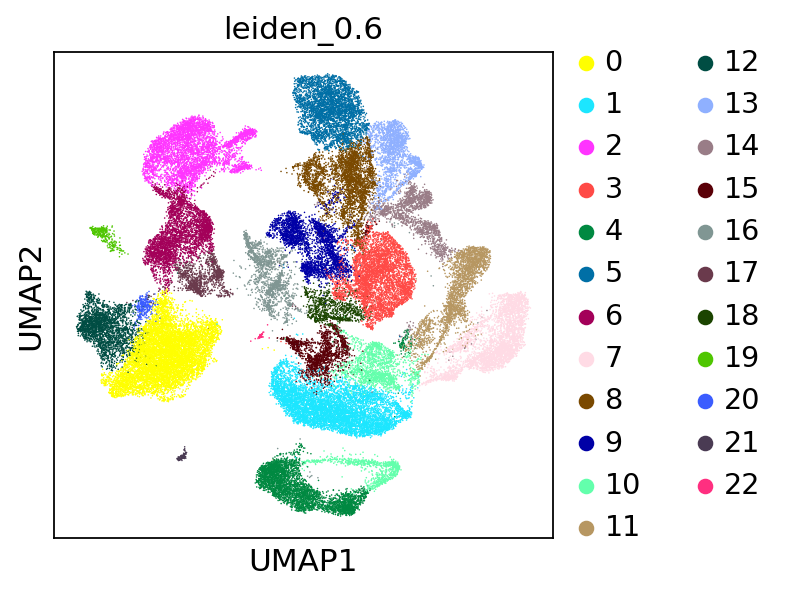

In [44]:
# to reassign the colors for leiden_0.6_colors
adata.uns['leiden_0.6_colors'] = adata.uns['leiden_colors']
sc.pl.umap(adata, color=["leiden_0.6"])

In [45]:
adata

AnnData object with n_obs × n_vars = 60832 × 2954
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0.6', 'leiden_0.4', 'leiden_0.2', 'leiden_0.1'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'leiden_colors', 'leiden_0.6_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [46]:
adata.uns["leiden_0.6_colors"]

['#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF']

In [0]:
# to keep color will be consistent when subsetting ???
adata.uns["fix_colors"] = 

In [0]:
adata = sc.read_h5ad("florian_concat_leiden.h5ad")

In [43]:
# notice that after applying umap using sc.pl.umap(adata, color=["leiden"]), its color will be saved in uns, remember to save it 
# however, if repeat the sc.pl.uamp again using different parameters, these info willl be erased
adata

AnnData object with n_obs × n_vars = 60832 × 2954
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0.6', 'leiden_0.4', 'leiden_0.2', 'leiden_0.1'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'leiden_0.6_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [0]:
adata.write_h5ad("florian_concat_leiden.h5ad")

In [0]:
# notice the label differene between florian's data and my ipsc
adata_florian_ipsc.obs.donor_label.value_counts()

PGP1-C2                         15326
NN0003932-C3                    11999
NCRM5-C5                         7371
KOLF2-ARID2-A02                  6507
doublet                          6389
NCRM1-C6                         6379
LNGPI1-C1                        5651
KUCG3-C1                         2925
donor7                           1823
nan                              1784
NN0003932-C3 or NN0004297-C1      310
unassigned                         59
Name: donor_label, dtype: int64

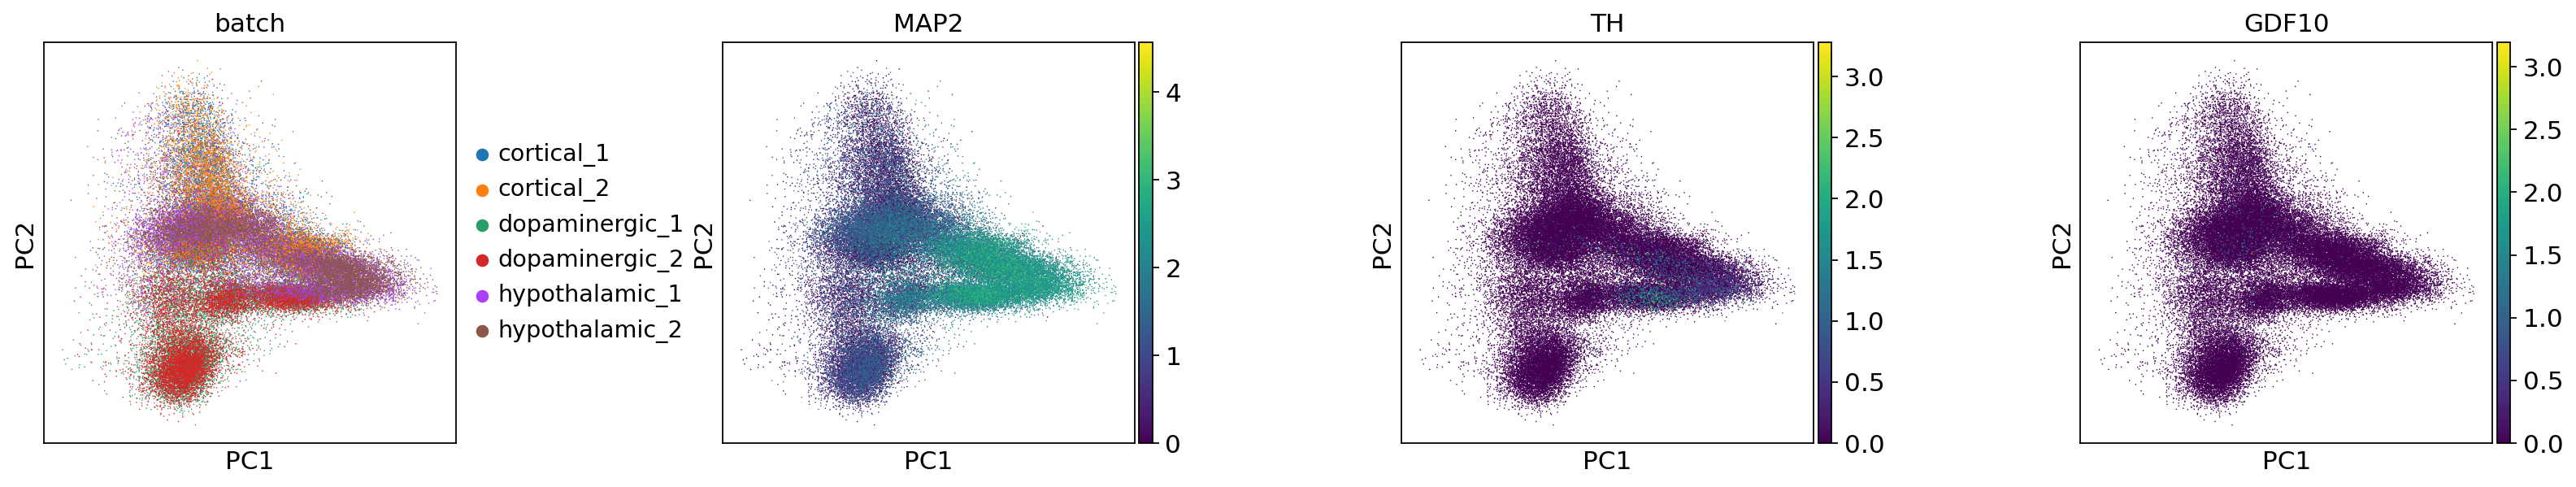

In [49]:
#use pca check the batch effect
#sc.tl.pca(adata, svd_solver='arpack')
#
sc.pl.pca(adata, color=['batch', "MAP2", "TH", "GDF10"], wspace=0.5)

Trying to set attribute `.uns` of view, copying.


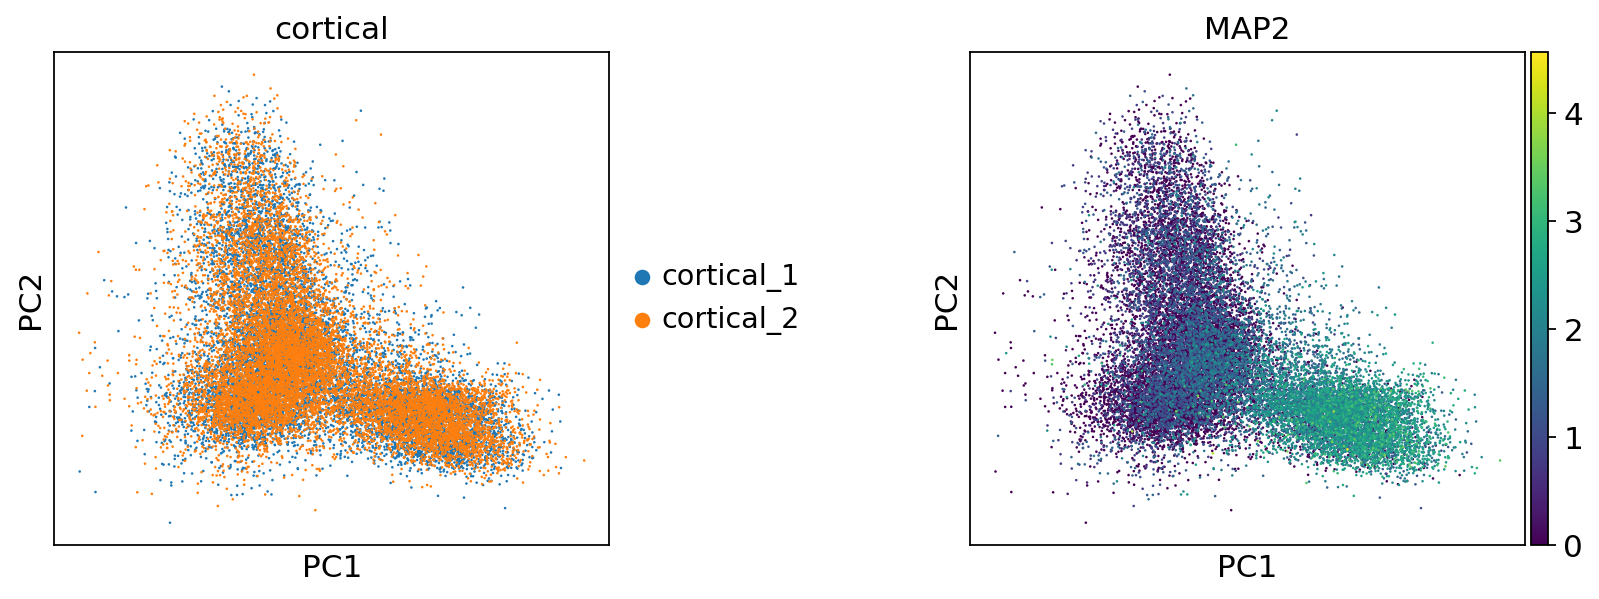

In [0]:
sc.pl.pca(adata[(adata.obs.batch=='cortical_1')|(adata.obs.batch=='cortical_2'), :], color=['batch', "MAP2"], wspace=0.5, title="cortical")

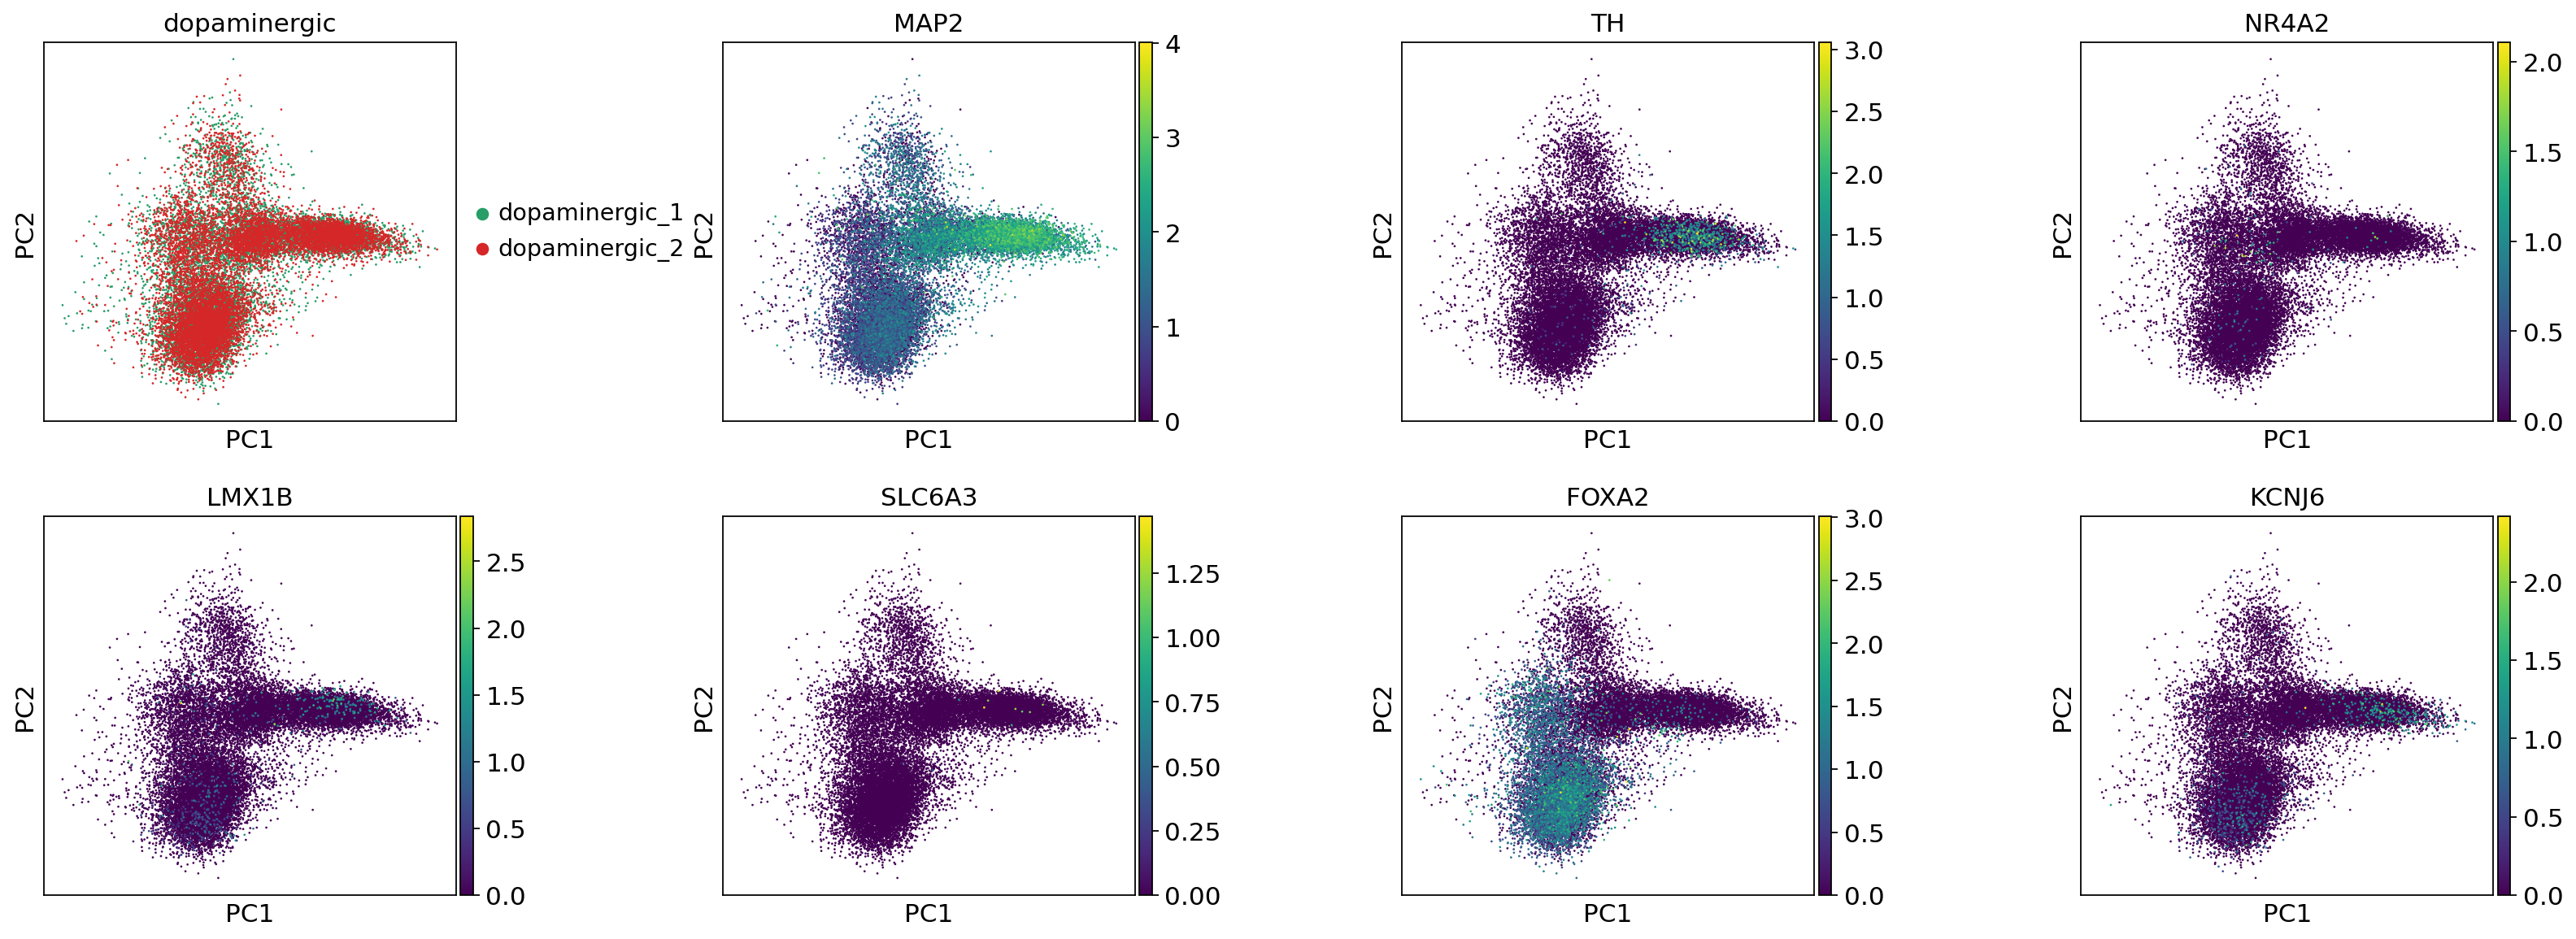

In [50]:
sc.pl.pca(adata[(adata.obs.batch=='dopaminergic_1')|(adata.obs.batch=='dopaminergic_2'), :], color=['batch', "MAP2", "TH", "NR4A2", "LMX1B", "SLC6A3", "FOXA2", "KCNJ6"], wspace=0.5, title="dopaminergic")

Trying to set attribute `.uns` of view, copying.


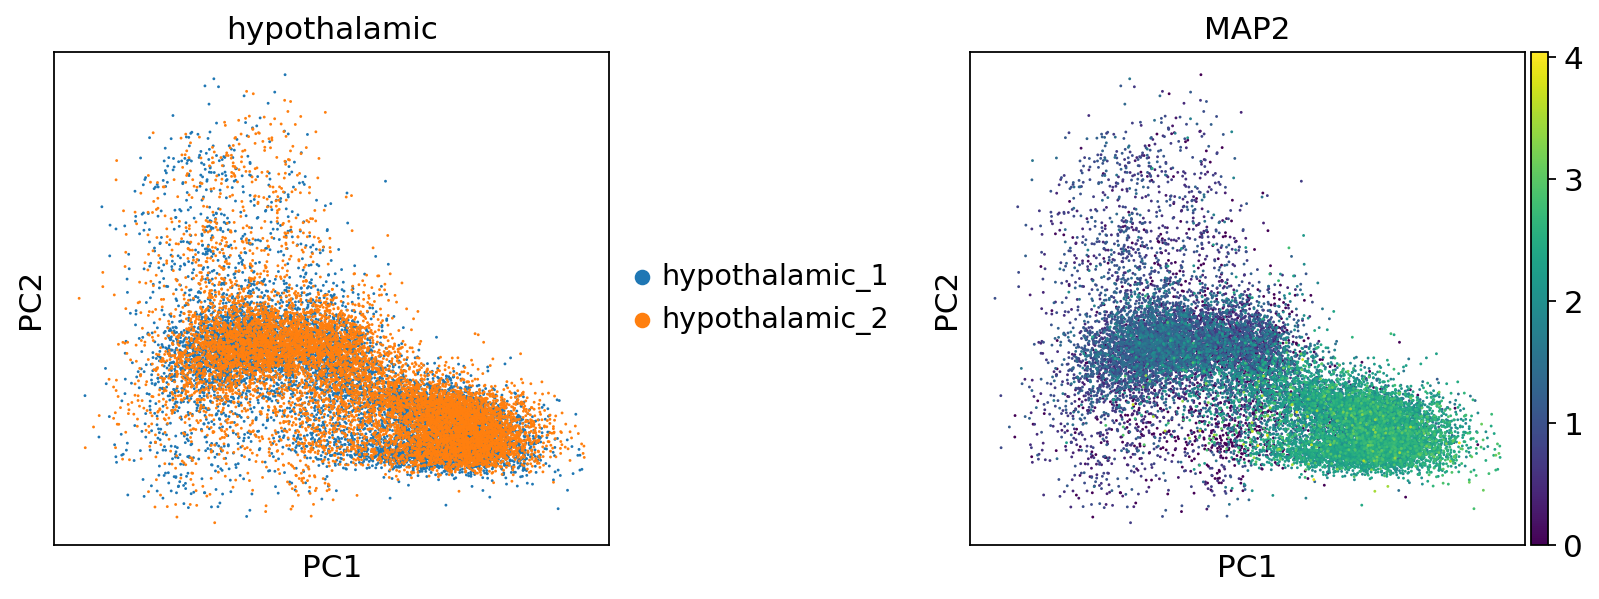

In [0]:
sc.pl.pca(adata[(adata.obs.batch=='hypothalamic_1')|(adata.obs.batch=='hypothalamic_2'), :], color=['batch', "MAP2"], wspace=0.5, title="hypothalamic")

In [0]:
adata.write_h5ad("florian_concat_leiden.h5ad")

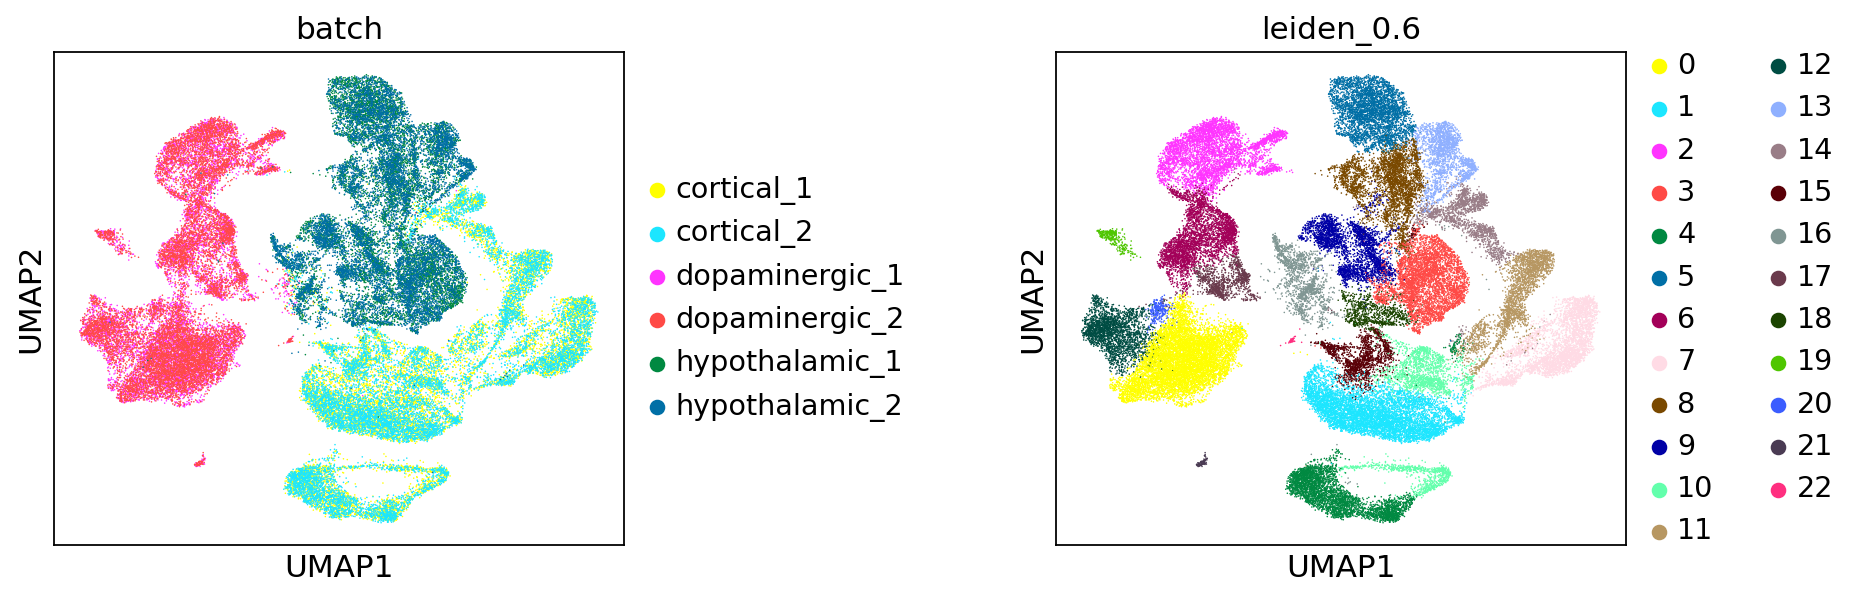

In [86]:
#palette=sc.pl.palettes.vega_20_scanpy, 
sc.pl.umap(adata, color=['batch', "leiden_0.6"], wspace=0.6, palette=sc.pl.palettes.default_102)

In [0]:
#batch_name = adata.obs.batch.value_counts().index.to_list()
batch_name =['cortical_1','cortical_2','dopaminergic_1','dopaminergic_2','hypothalamic_1','hypothalamic_2']

In [56]:
adata.obs.batch.value_counts()

cortical_2        11537
dopaminergic_2    10707
cortical_1        10578
dopaminergic_1     9725
hypothalamic_2     9358
hypothalamic_1     8927
Name: batch, dtype: int64

In [64]:
adata

AnnData object with n_obs × n_vars = 60832 × 2954
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0.6', 'leiden_0.4', 'leiden_0.2', 'leiden_0.1'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'batch_colors', 'leiden_0.6_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

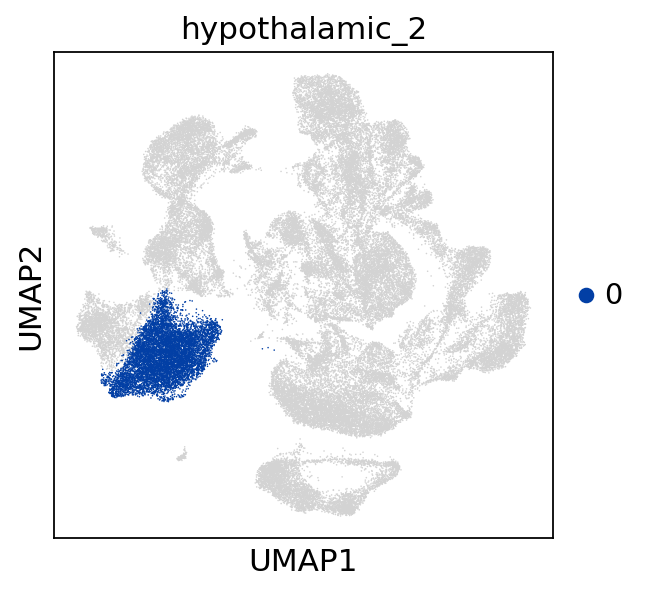

In [67]:
sc.pl.umap(adata,color=['leiden_0.6'], wspace=0.6, title=batch, groups=["0"])

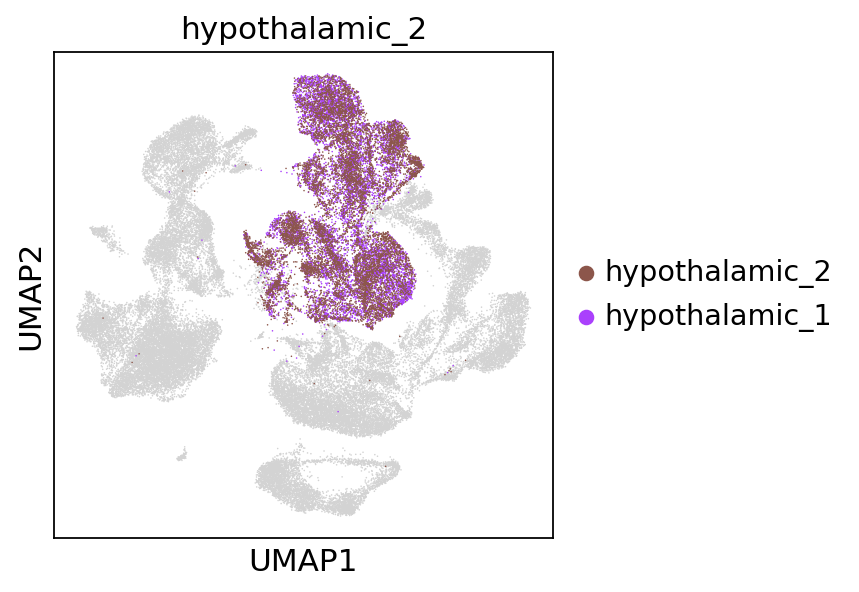

In [68]:
sc.pl.umap(adata,color=['batch'], wspace=0.6, title=batch, groups=["hypothalamic_2", "hypothalamic_1"])

In [85]:
adata

AnnData object with n_obs × n_vars = 60832 × 2954
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0.6', 'leiden_0.4', 'leiden_0.2', 'leiden_0.1'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [0]:
adata.uns["leiden_0.6_colors"]

In [0]:
batch_name =['cortical_1','cortical_2','dopaminergic_1','dopaminergic_2','hypothalamic_1','hypothalamic_2']

Trying to set attribute `.uns` of view, copying.


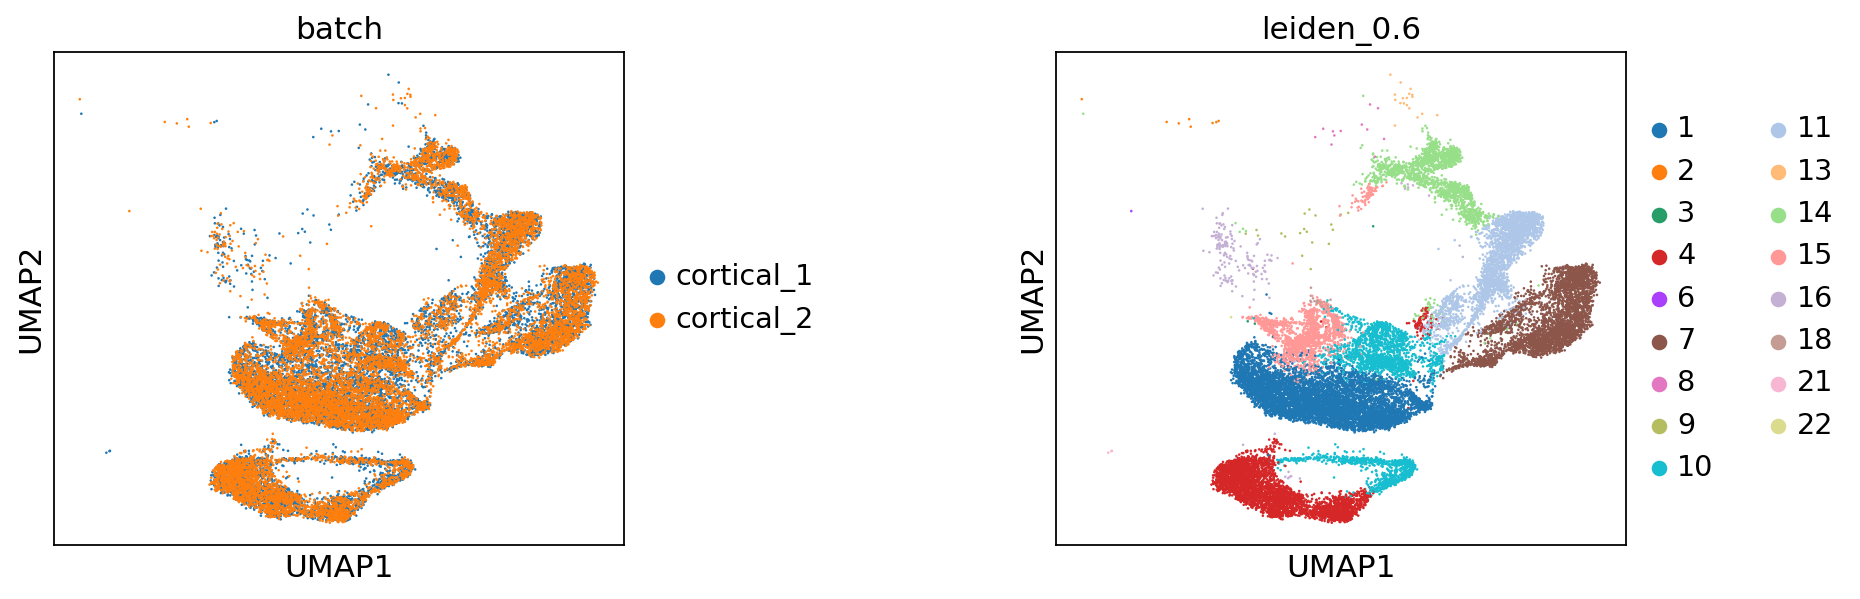

In [82]:
# there are still some slight different between the number of cluster between two batches, there it is better to show using bar graphs
sc.pl.umap(adata[(adata.obs["batch"]=="cortical_1") | (adata.obs["batch"]=="cortical_2"),:], color=['batch','leiden_0.6'], wspace=0.6)

Trying to set attribute `.uns` of view, copying.


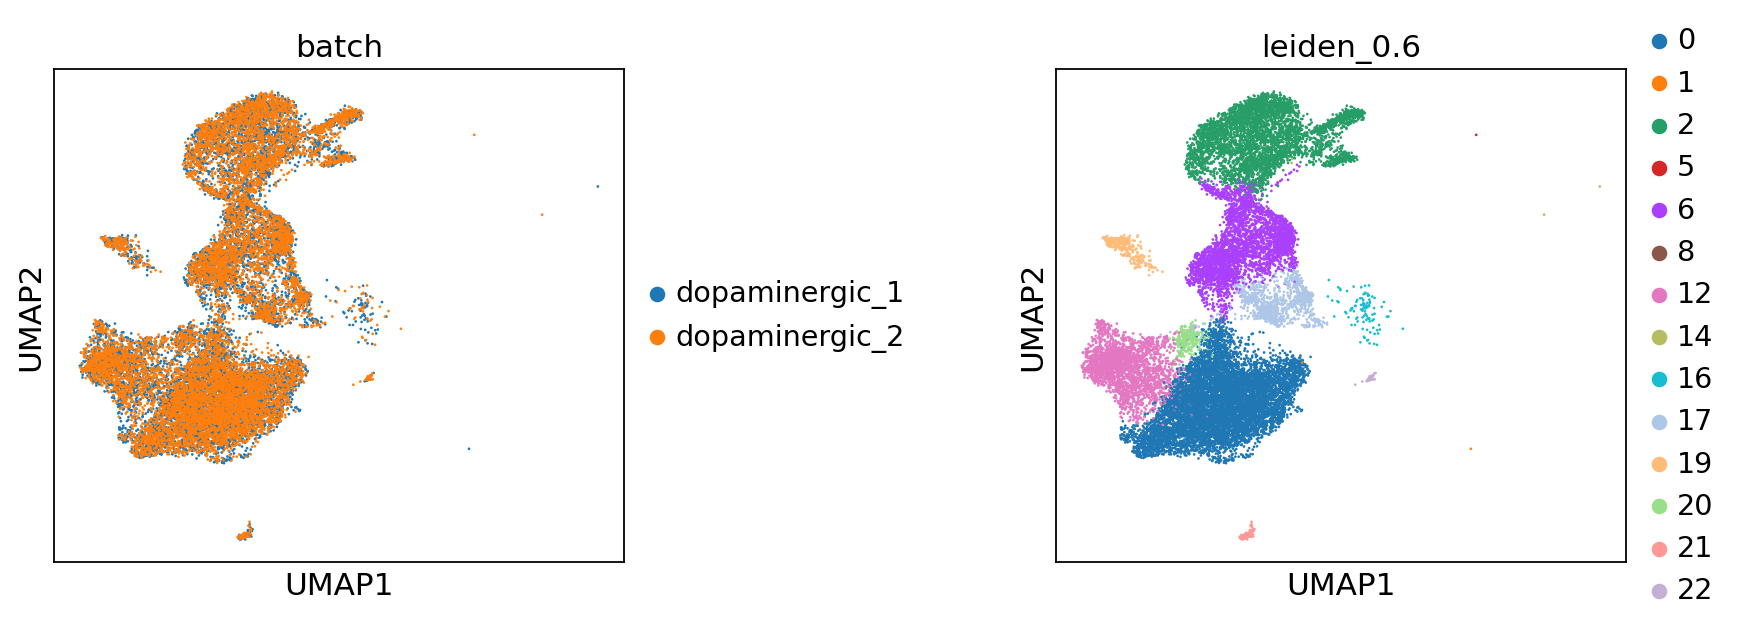

In [83]:
sc.pl.umap(adata[(adata.obs["batch"]=="dopaminergic_1") | (adata.obs["batch"]=="dopaminergic_2"),:], color=['batch','leiden_0.6'], wspace=0.6)

Trying to set attribute `.uns` of view, copying.


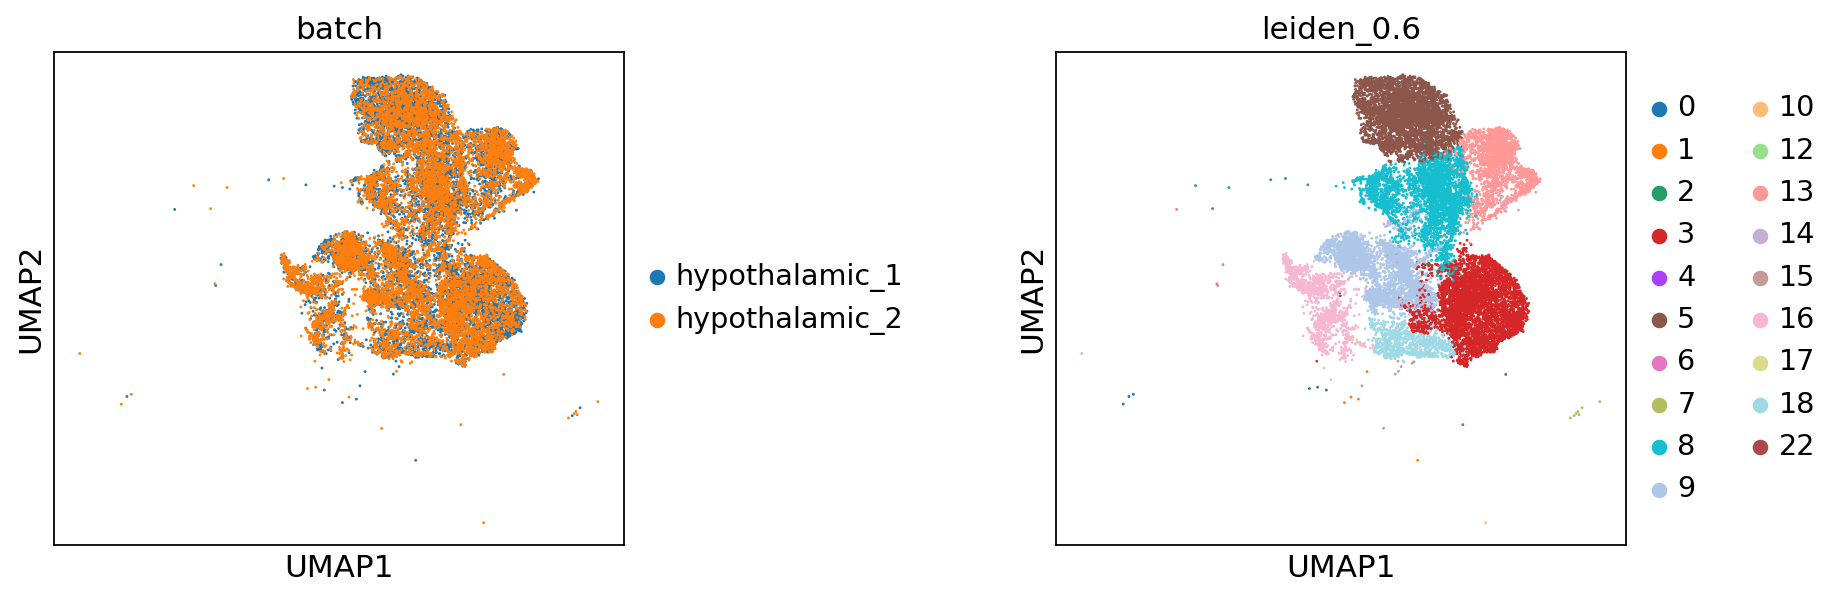

In [84]:
sc.pl.umap(adata[(adata.obs["batch"]=="hypothalamic_1") | (adata.obs["batch"]=="hypothalamic_2"),:], color=['batch','leiden_0.6'], wspace=0.6)

# Calculate the percentage of cells for a specific cluster for a specific donors

In [0]:
df = adata.obs.loc[:, ["donor_label","batch","leiden_0.6"]]

In [422]:
df["leiden"] = df["leiden_0.6"]
#df["cell_count"] = 1
df.head()

donor_label       batch leiden_0.6 leiden
AAACCCAAGCAAATGT-1-cortical_1        LNGPI1-C1  cortical_1         15     15
AAACCCAAGGATGGCT-1-cortical_1     NN0003932-C3  cortical_1         14     14
AAACCCAAGTGCTACT-1-cortical_1          PGP1-C2  cortical_1          4      4
AAACCCACAGGACATG-1-cortical_1          PGP1-C2  cortical_1          4      4
AAACCCACATCTTTCA-1-cortical_1  KOLF2-ARID2-A02  cortical_1          1      1

In [423]:
df = df.reset_index()
df.drop(["index","leiden_0.6"], axis=1, inplace=True)
df.head()
print(df.shape)

(60832, 3)


In [299]:
df["batch"].value_counts()

cortical_2        11537
dopaminergic_2    10707
cortical_1        10578
dopaminergic_1     9725
hypothalamic_2     9358
hypothalamic_1     8927
Name: batch, dtype: int64

In [0]:
# only get a batch to do that
df_b1 = df[df["batch"] == "cortical_1"]

In [434]:
df_b1

donor_label       batch leiden
0            LNGPI1-C1  cortical_1     15
1         NN0003932-C3  cortical_1     14
2              PGP1-C2  cortical_1      4
3              PGP1-C2  cortical_1      4
4      KOLF2-ARID2-A02  cortical_1      1
...                ...         ...    ...
10573        LNGPI1-C1  cortical_1     15
10574  KOLF2-ARID2-A02  cortical_1      1
10575  KOLF2-ARID2-A02  cortical_1     11
10576        LNGPI1-C1  cortical_1      7
10577          doublet  cortical_1      1

[10578 rows x 3 columns]

In [0]:
#try to convert it into the shape of interest
df_b1_indexed = df_b1.groupby(["donor_label", "leiden"]).count().sort_index()

In [436]:
df_b1_indexed

batch
donor_label     leiden       
KOLF2-ARID2-A02 0         NaN
                1       541.0
                2         NaN
                3         NaN
                4       118.0
...                       ...
unassigned      18        NaN
                19        NaN
                20        NaN
                21        NaN
                22        NaN

[253 rows x 1 columns]

In [0]:
df_b1_indexed_unstack = df_b1_indexed.unstack().fillna(0).astype("int")

In [451]:
df_b1_indexed_unstack

batch                             ...                           
leiden              0    1  2  3    4  5  6    7  ...   15  16 17 18 19 20 21 22
donor_label                                       ...                           
KOLF2-ARID2-A02     0  541  0  0  118  0  0  261  ...  113  19  0  2  0  0  0  0
KUCG3-C1            0   36  0  0   14  0  0   15  ...    2   0  0  0  0  0  0  0
LNGPI1-C1           0   41  1  1   46  0  0   35  ...  467  14  0  0  0  0  2  0
NCRM1-C6            0  184  0  0  219  0  0  125  ...   10   7  0  0  0  0  0  0
NCRM5-C5            0  472  0  0  206  0  0  181  ...   13  10  0  3  0  0  0  0
NN0003932-C3        0  780  1  0  333  0  0  305  ...   52  15  0  5  0  0  0  0
PGP1-C2             0  599  0  0  671  0  0  484  ...   39  11  0  2  0  0  0  0
donor7              0    0  0  0    0  0  0    0  ...    0   0  0  0  0  0  0  0
doublet             0  413  0  0  129  0  0  259  ...   71   1  0  0  0  0  1  0
nan                 0    8  0  0    2  0  0    8  ...    1   6  0  0  0  0  0  1
unassigned          0    1  0  0    1  0  0    1  ...    1   1  0  0  0  0  0  0

[11 rows x 23 columns]

In [0]:
# remove out level of columns
df_b1_indexed_unstack.columns = df_b1_indexed_unstack.columns.droplevel(level = 0)

In [2]:
df_b1_indexed_unstack

NameError: ignored

In [1]:
cluster_name = df_b1_indexed_unstack.columns.to_list()
cluster_name

NameError: ignored

In [0]:

from cycler import cycler

donor_name = 'PGP1-C2',
 'NN0003932-C3',
 'NCRM5-C5',
 'doublet',
 'KOLF2-ARID2-A02',
 'NCRM1-C6',
 'LNGPI1-C1',
 'KUCG3-C1',

cluster_name = df_b1_indexed_unstack.columns.to_list()

bar_l = range(len(donor_name))

cm = plt.get_cmap('nipy_spectral')

f, ax = plt.subplots(1, figsize=(10,5))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(cluster_name)) for i in range(len(cluster_name))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(cluster_name):
    y = 
    ax.bar(bar_l, y, bottom = bottom, label=deg)
    bottom += df[deg].values
ax.grid(False)
ax.set_xticks(bar_l)
ax.set_xticklabels(df['INSTNM'].values, rotation=90, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=2, fontsize='x-small')
f.subplots_adjust(right=0.75, bottom=0.4)
f.show()

In [0]:
#subset using batch first
#df_cor = df[df["batch"].isin(["cortical_2", "cortical_1"])]

In [350]:
df_cor["total_cell"] = df_cor["cell_count"].sum()
df_cor["percentage_per_cluster"] = df_cor["cell_count"]/df_cor["total_cell"]
df_cor.head()

cell_count  total_cell  percentage_per_cluster
leiden                                                
0                0        1505                0.000000
1              541        1505                0.359468
2                0        1505                0.000000
3                0        1505                0.000000
4              118        1505                0.078405

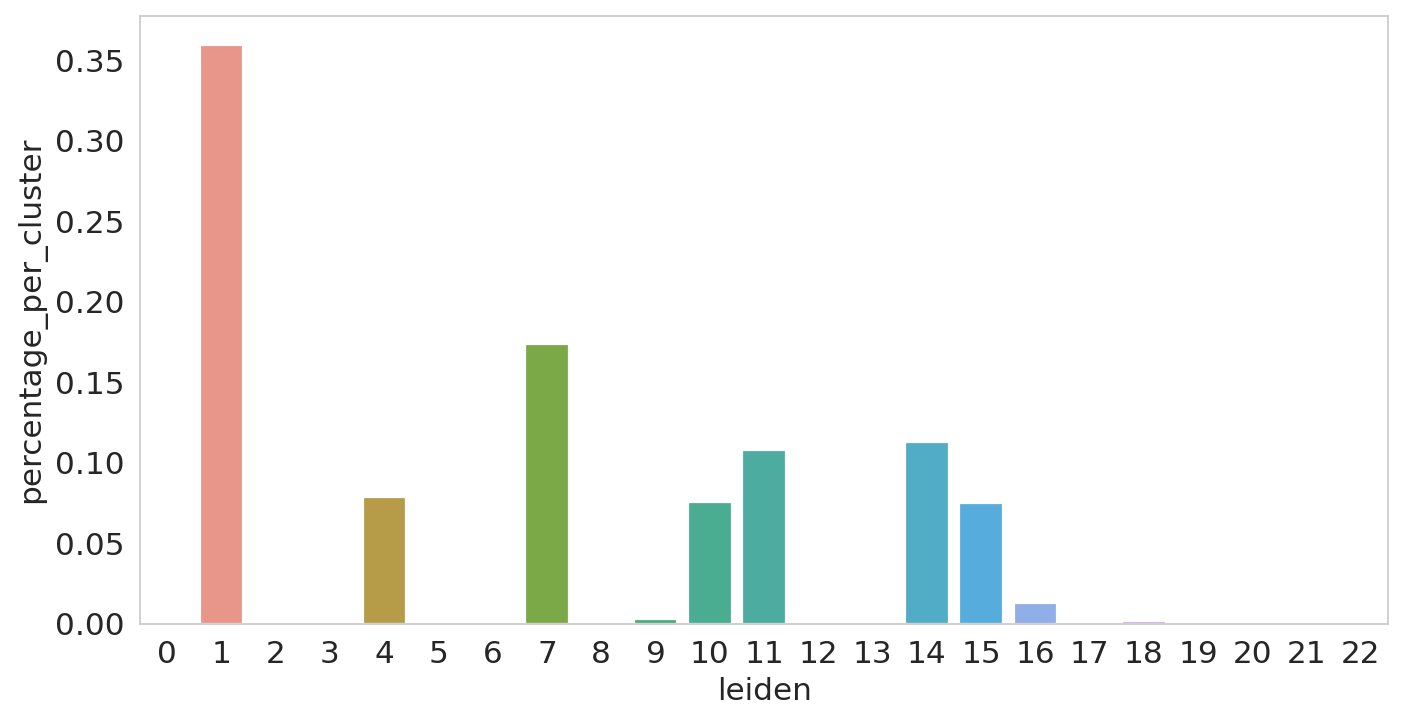

In [354]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=df_cor.index, y = "percentage_per_cluster", data=df_cor)
ylim = (0,1)

In [363]:
df.index.to_flat_index

<bound method Index.to_flat_index of RangeIndex(start=0, stop=60832, step=1)>

In [0]:
df.donor_label.value_counts().index.tolist()

In [0]:
df.leiden.value_counts().index.tolist()

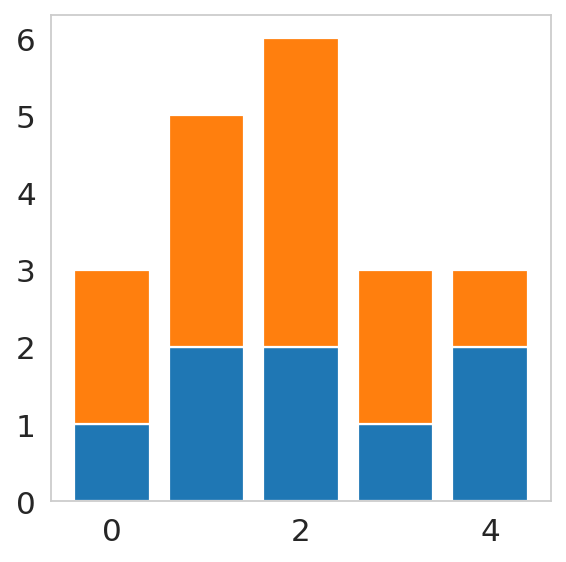

In [355]:
# We use the keyword bottom to do this
# The top bar will have bottom set as height

# First Bar
video_game_hours = [1, 2, 2, 1, 2]
plt.bar(range(len(video_game_hours)),
  video_game_hours)

# Second Bar
book_hours = [2, 3, 4, 2, 1]
plt.bar(range(len(book_hours)),
  book_hours,
  bottom=video_game_hours)

# third bar


# Get each bottom for 3+ bars
sport_hours = np.add(video_game_hours, book_hours)


# Try to draw stack bar plot

In [369]:
cluster =['cluster1', 'cluster2', 'cluster3']
for i, deg in enumerate(cluster):
  print(deg)

cluster1
cluster2
cluster3


In [0]:

from cycler import cycler

df = pd.read_csv('/content/drive/My Drive/Most-Recent-Cohorts-All-Data-Elements.csv')
df = df.iloc[0:10]
degList = [i for i in df.columns if i[0:4]=='PCIP']
bar_l = range(df.shape[0])

cm = plt.get_cmap('nipy_spectral')

f, ax = plt.subplots(1, figsize=(10,5))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    print(i, deg)
    ax.bar(bar_l, df[deg], bottom = bottom, label=deg)
    print(df[deg])
    bottom += df[deg].values
ax.grid(False)
ax.set_xticks(bar_l)
ax.set_xticklabels(df['INSTNM'].values, rotation=90, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=2, fontsize='x-small')
f.subplots_adjust(right=0.75, bottom=0.4)
f.show()

In [0]:
adata.obs

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:04:06)


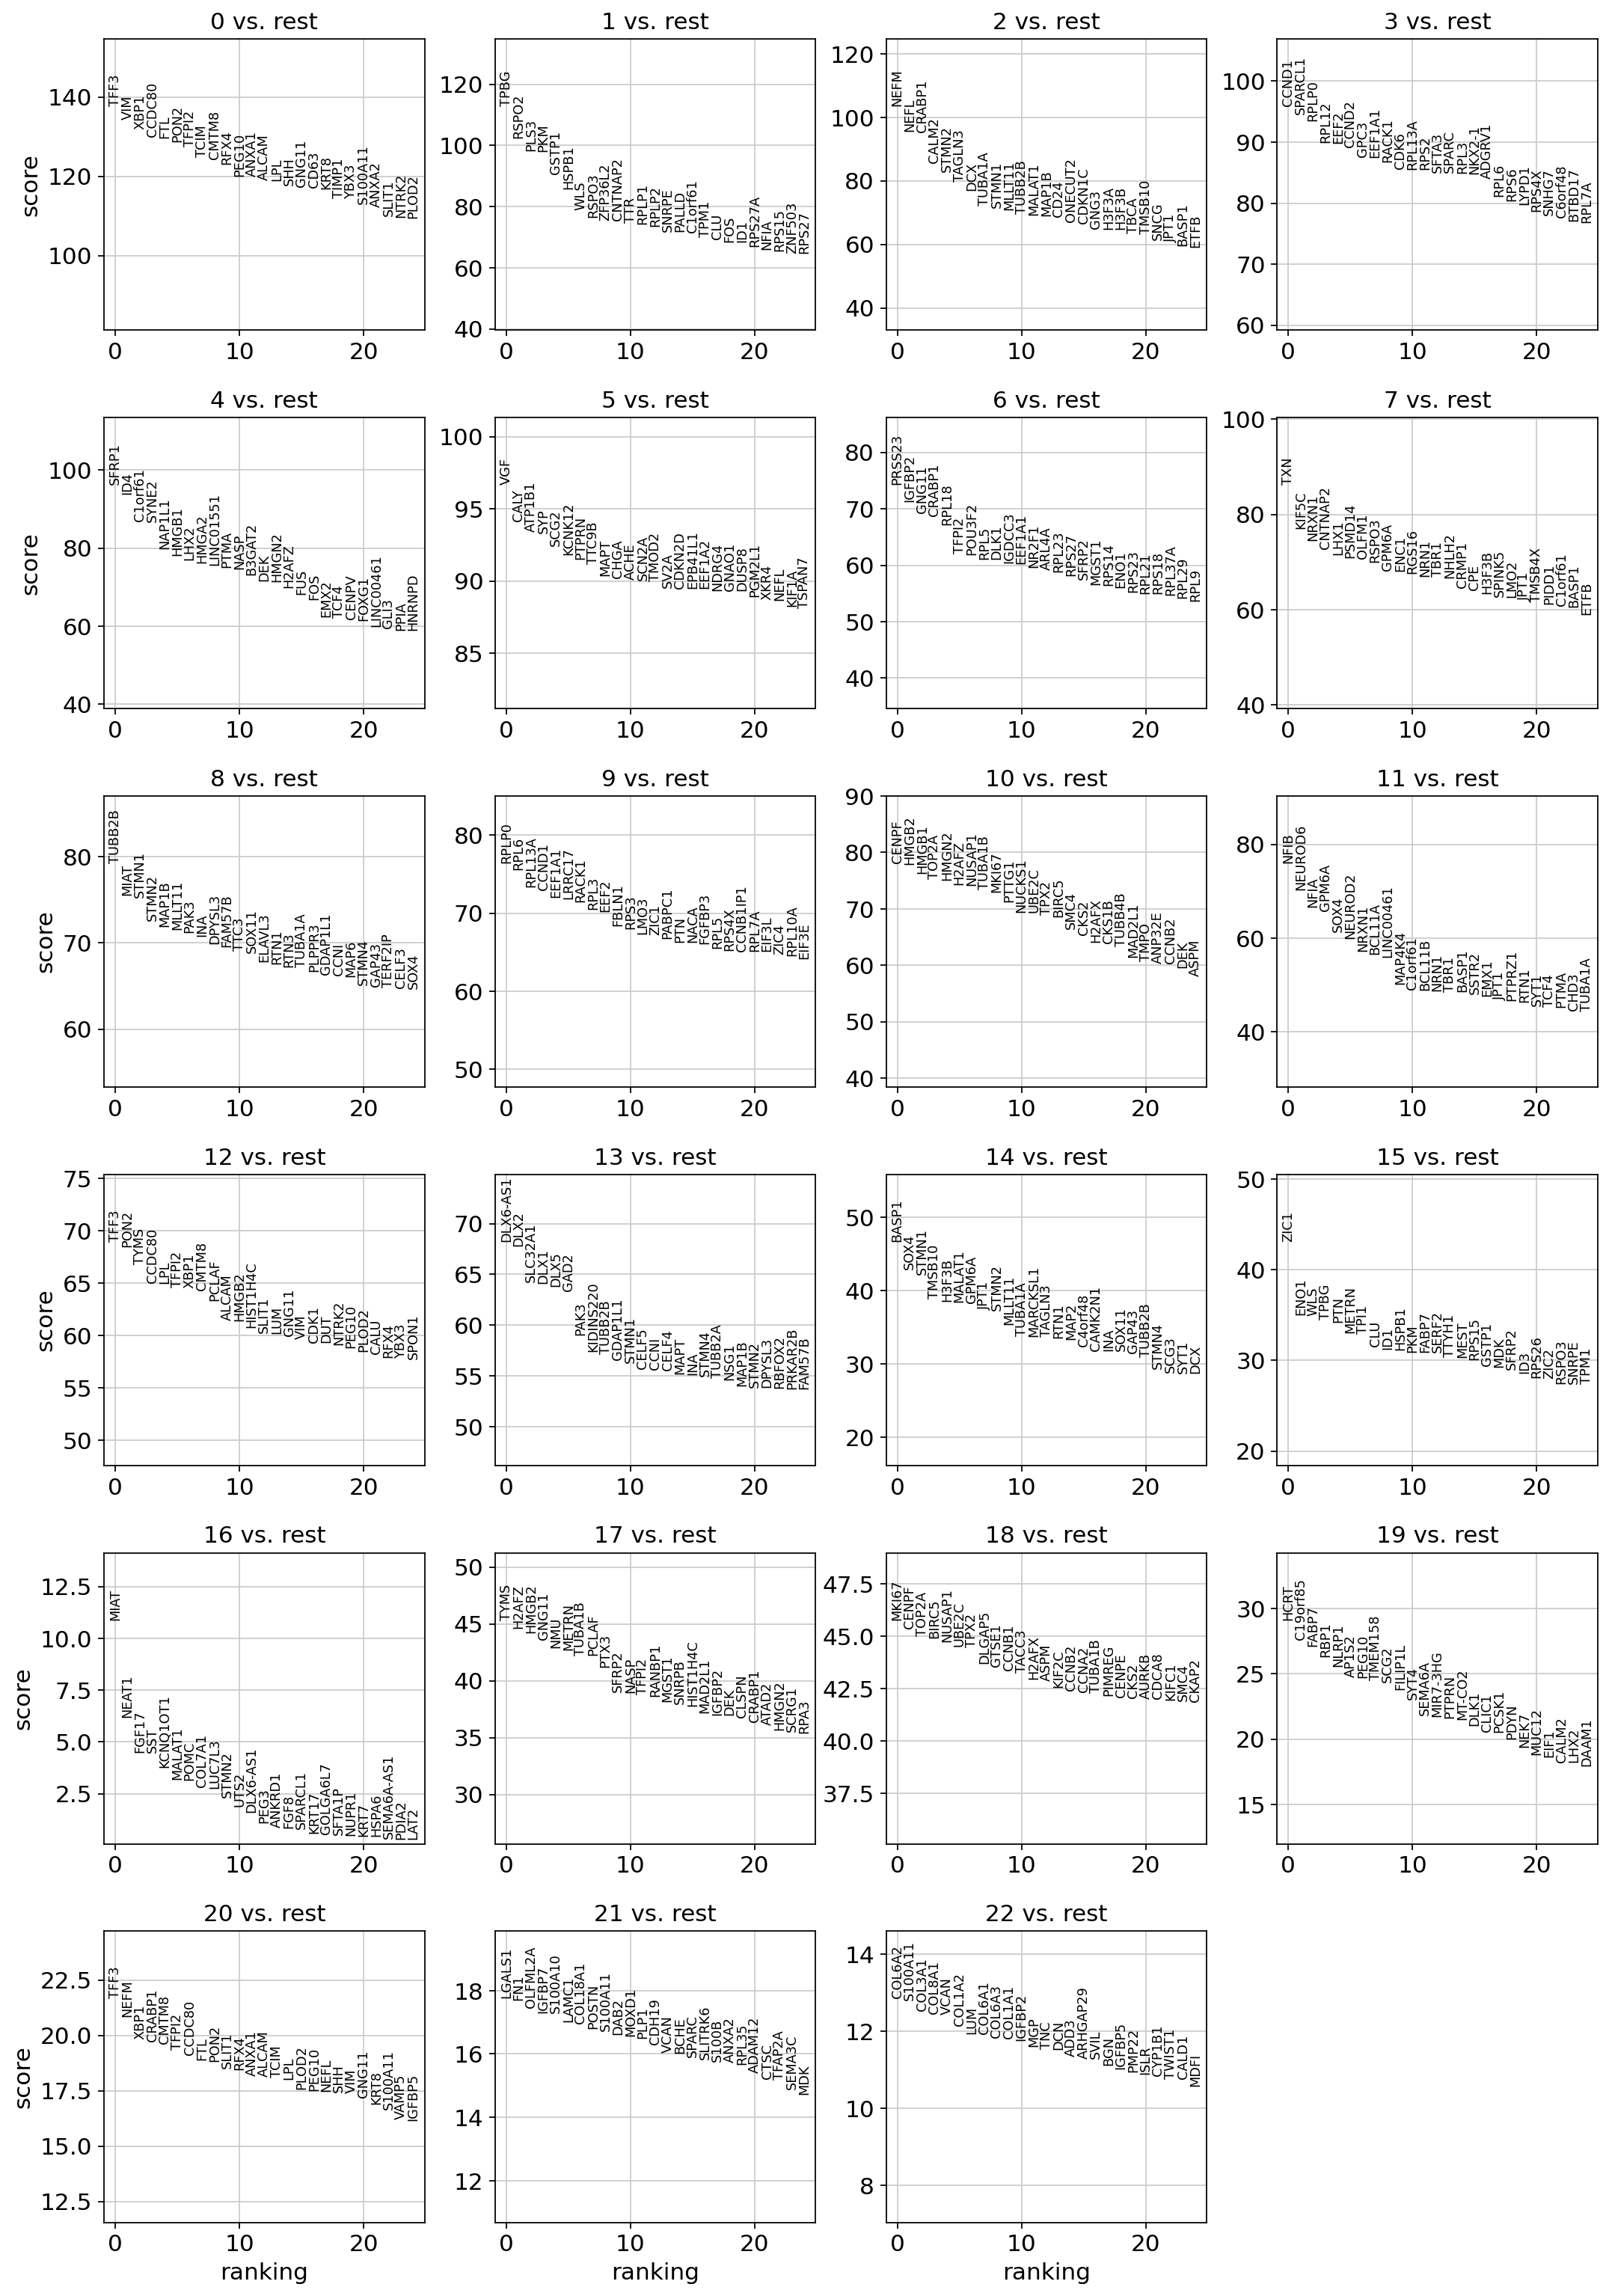

In [0]:
sc.tl.rank_genes_groups(adata, 'leiden_0.6', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [0]:
adata.write_h5ad("florian_concat_leiden.h5ad")

In [0]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

0        1       2        3  ...        19      20       21       22
0    TFF3     TPBG    NEFM    CCND1  ...      HCRT    TFF3   LGALS1   COL6A2
1     VIM    RSPO2    NEFL  SPARCL1  ...  C19orf85    NEFM      FN1  S100A11
2    XBP1     PLS3  CRABP1    RPLP0  ...     FABP7    XBP1  OLFML2A   COL3A1
3  CCDC80      PKM   CALM2    RPL12  ...      RBP1  CRABP1   IGFBP7   COL8A1
4     FTL    GSTP1   STMN2     EEF2  ...     NLRP1   CMTM8  S100A10     VCAN
5    PON2    HSPB1  TAGLN3    CCND2  ...     AP1S2   TFPI2    LAMC1   COL1A2
6   TFPI2      WLS     DCX     GPC3  ...     PEG10  CCDC80  COL18A1      LUM
7    TCIM    RSPO3  TUBA1A   EEF1A1  ...   TMEM158     FTL    POSTN   COL6A1
8   CMTM8  ZFP36L2   STMN1    RACK1  ...      SCG2    PON2  S100A11   COL6A3
9    RFX4  CNTNAP2  MLLT11     CDK6  ...   FILIP1L   SLIT1     DAB2   COL1A1

[10 rows x 23 columns]

In [0]:
gene_list = pd.DataFrame(adata.uns['rank_genes_groups']['names']).iloc[0, :].values


In [0]:
gene_list

array(['TFF3', 'TPBG', 'NEFM', 'CCND1', 'SFRP1', 'VGF', 'PRSS23', 'TXN',
       'TUBB2B', 'RPLP0', 'CENPF', 'NFIB', 'TFF3', 'DLX6-AS1', 'BASP1',
       'ZIC1', 'MIAT', 'TYMS', 'MKI67', 'HCRT', 'TFF3', 'LGALS1',
       'COL6A2'], dtype=object)

In [0]:
sc.settings.set_figure_params(dpi=80, figsize=(10, 4))
for gene in gene_list:
  print(gene)
  sc.pl.violin(adata, gene, groupby='leiden_0.6')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# It seems that 2, 7, 13, 19 and, 21, 22 can be identified by one gene (NEFM, TXN, DLX6-AS1, HCRT, LGAALS1, COL6A2)

In [0]:
# TFF3 specfic for 0, 12,20 (dompaminergic); TPBG for (cortical)
sc.settings.set_figure_params(dpi=80, figsize=(4, 4))
for gene in gene_list:
  print(gene)
  sc.pl.umap(adata, color=['leiden_0.6', gene], wspace=0.5)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
marker_df = pd.read_csv("integrated_data/PanglaoDB_markers_27_Mar_2020_delete1.csv")

In [0]:
# Description: Interneurons create neural circuits, enabling communication between sensory or motor neurons and the central nervous system.
# Description: Neurons of the Trigeminal ganglion (relaying sensation in the face and motor functions).
# Description: A neuroblast is a postmitotic cell that does not divide further and which will develop into a neuron after a migration phase. 
# Neuroblasts differentiate from neural stem cells and are committed to become neurons.

In [0]:
cell_types = ['Dopaminergic neurons', 'GABAergic neurons', 'Glutaminergic neurons', 'Glycinergic neurons', 'Immature neurons', 
'Interneurons', 'Motor neurons', 'Neural stem/precursor cells', 'Neurons', 'Noradrenergic neurons', 'Neuroblasts', 'Neuroendocrine cells', 
'Adrenergic neurons', 'Cholinergic neurons', 'Noradrenergic neurons', 'Purkinje neurons', 'Serotonergic neurons', 'Trigeminal neurons']

In [0]:
marker_dic = {}
for type in cell_types:
  marker_dic[type] = marker_df[marker_df["cell type"] == type]["official gene symbol"].to_list()

cell_annotation = sc.tl.marker_gene_overlap(adata, marker_dic, key='rank_genes_groups')

In [0]:
cell_annotation

0    1    2    3    4  ...   13   14   15   16   17
Dopaminergic neurons         1.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0  0.0
GABAergic neurons            0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0
Glutaminergic neurons        1.0  0.0  1.0  0.0  1.0  ...  1.0  0.0  0.0  1.0  0.0
Glycinergic neurons          0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Immature neurons             2.0  0.0  2.0  1.0  1.0  ...  1.0  1.0  0.0  0.0  0.0
Interneurons                 5.0  1.0  4.0  0.0  2.0  ...  2.0  0.0  0.0  1.0  0.0
Motor neurons                0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Neural stem/precursor cells  6.0  1.0  1.0  2.0  3.0  ...  1.0  6.0  1.0  0.0  0.0
Neurons                      7.0  0.0  9.0  0.0  3.0  ...  6.0  1.0  1.0  0.0  0.0
Noradrenergic neurons        0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0
Neuroblasts                  3.0  0.0  6.0  0.0  2.0  ...  0.0  1.0  0.0  1.0  0.0
Neuroendocrine cells         0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Adrenergic neurons           0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0  0.0  0.0  0.0
Cholinergic neurons          0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Purkinje neurons             1.0  0.0  0.0  0.0  0.0  ...  2.0  0.0  0.0  0.0  0.0
Serotonergic neurons         0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Trigeminal neurons           0.0  0.0  2.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0

[17 rows x 18 columns]

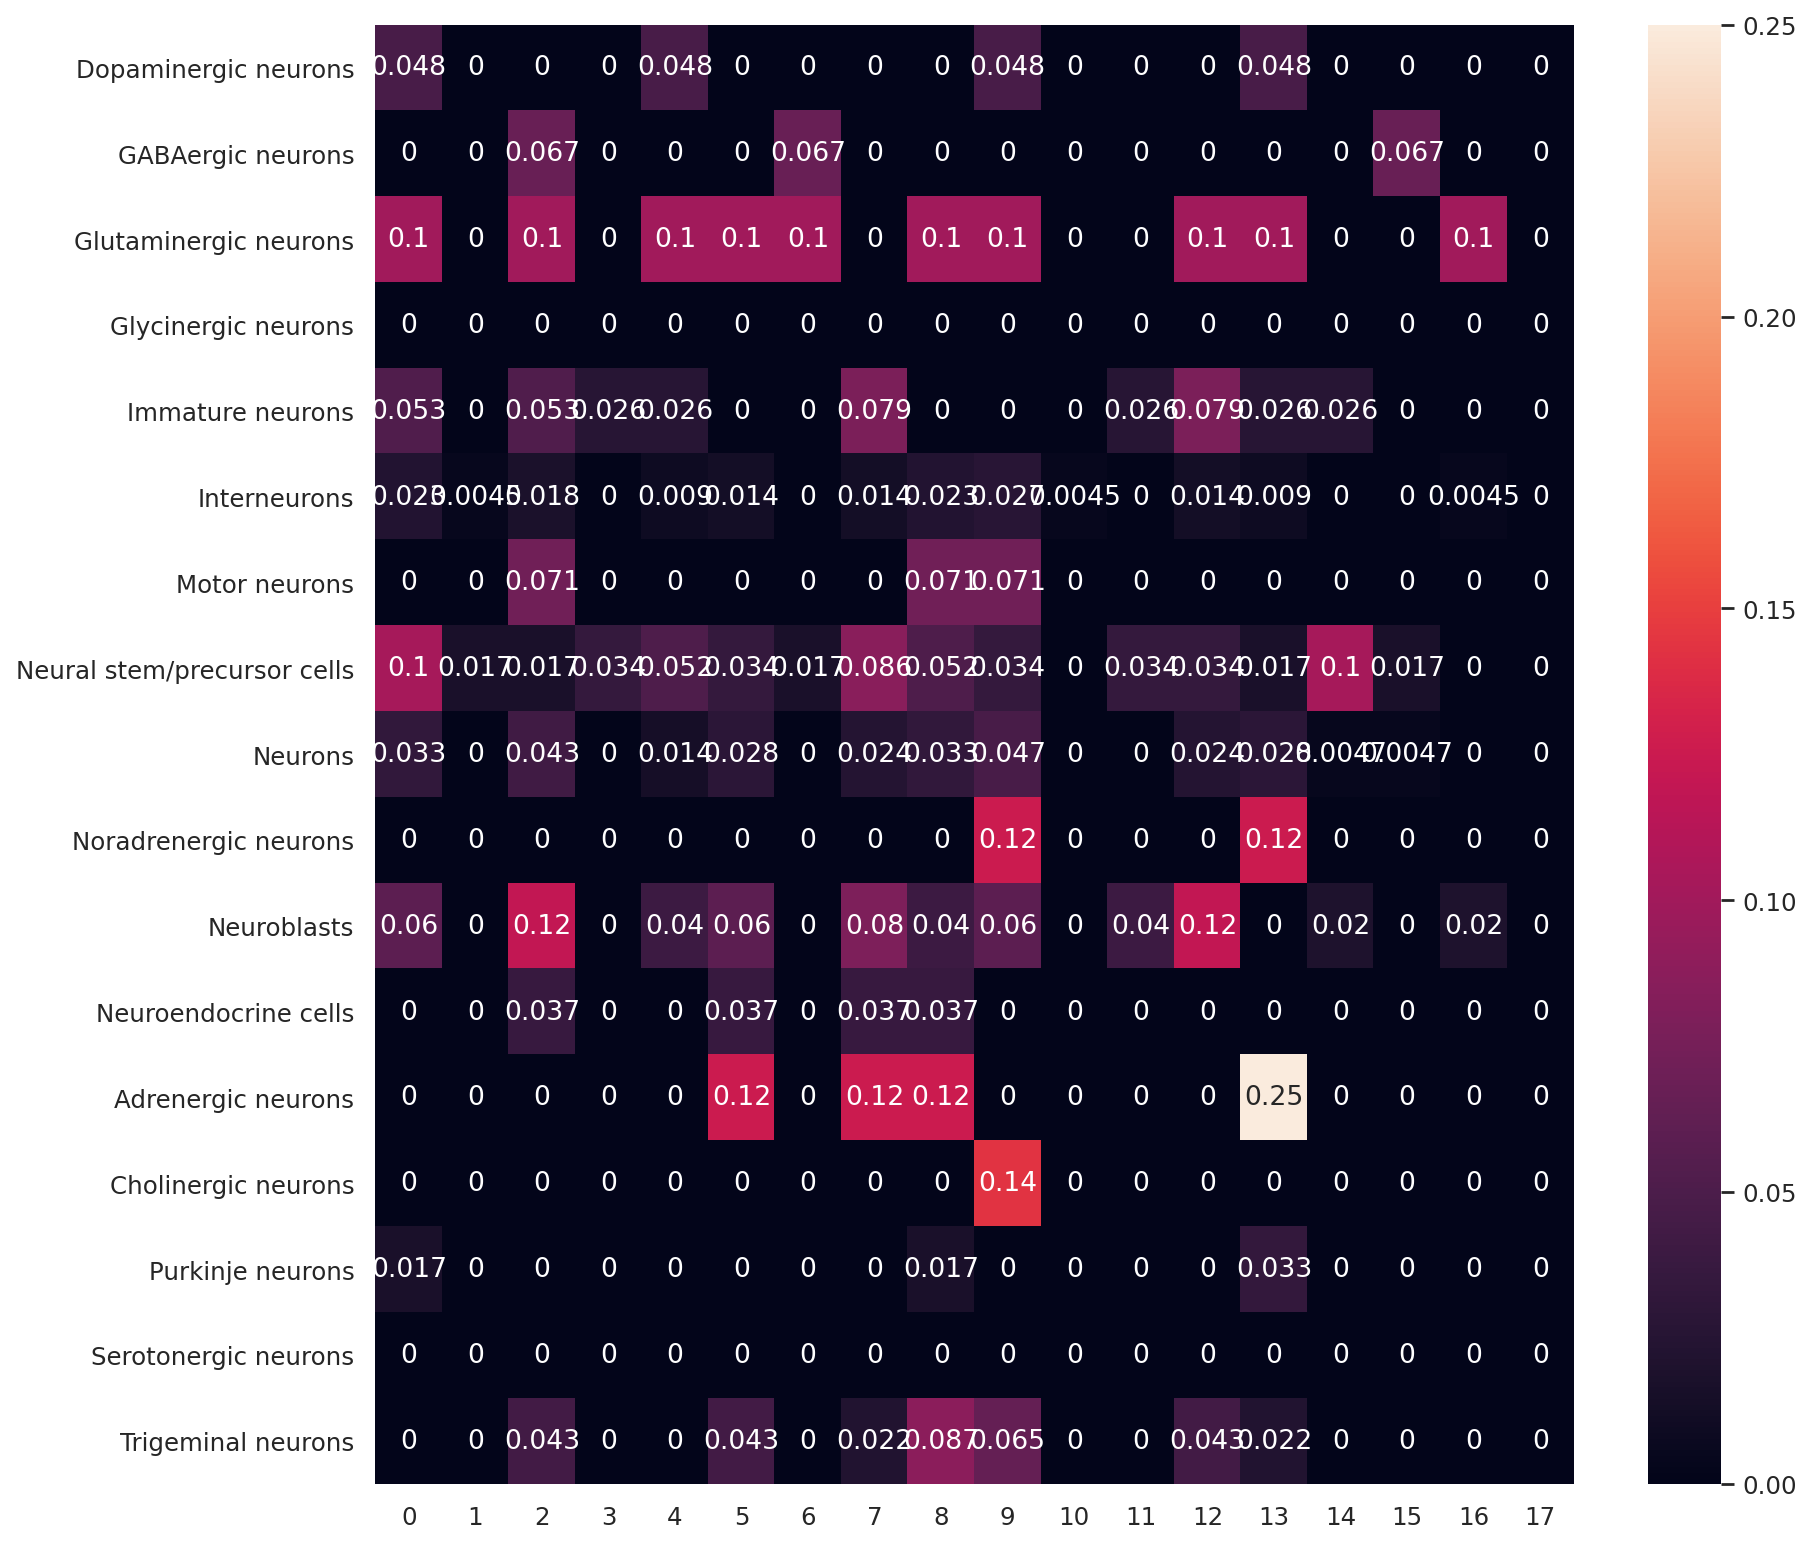

In [0]:

import seaborn as sb
cell_annotation_norm = sc.tl.marker_gene_overlap(adata, marker_dic, key='rank_genes_groups', normalize='reference')
sb.set(rc={'figure.figsize':(12, 12)})
# cbar=False, 
sb.heatmap(cell_annotation_norm, annot=True)

In [0]:
## ???refine known markers by only choose those only mainly expressed in less than 2 cell types
marker_dic2 = {}
for type in cell_types:
  marker_dic2[type] = marker_df[(marker_df["cell type"] == type) & (marker_df[""]) ]["official gene symbol"].to_list()

cell_annotation = sc.tl.marker_gene_overlap(adata, marker_dic2, key='rank_genes_groups')
cell_annotation

# Annotation

mixed, Glutaminergic neurons, Interneurons/precursor, Adrenergic neurons, mixed,

In [0]:
# reassing the cluster names
adata.rename_categories('leiden_0.4', ['TA', 'EP (early)', 'Stem', 'Goblet', 'EP (stress)', 'Enterocyte', 'Paneth', 'Enteroendocrine', 'Tuft'])

simply at the fraction of known marker genes that are found in the cluster marker gene sets from the rank_genes_groups() function.

In [0]:
#not execulte yet
out_dir = 'integrated_data/iPSC_combined2_hNGN2_NIL_13May2020.h5d'
adata.write(out_dir)